<a href="https://colab.research.google.com/github/bioserenina/silk_road_cultural_admixture/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 9.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=208ca0ba75501f44bbb51f44a31049eb5cf1bd3bcdd00acf6746e3bf254842bd
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=a185329b2e00ce89a8dde707edec94b3d8a36c54ef7082911f6de9e789c559f7
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [2]:
import pandas
import numpy
import umap.umap_ as umap

from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

In [3]:
tab = pandas.read_csv('drive/My Drive/assegno_padova/clustering/DATA_FP_ERC_SILK.txt', sep="\t", index_col=0)
tab

,STATUS,NACL,PROP,LIVER,DARK_CHOCOLATE,MILK_CHOCOLATE,CAFFE,ORANGE_JUICE,LEMONS,PANE_DOLCE,...,X.1,X.2,X.3,X.4,FID,IID,sex,age,paese,village
id,,,,,,,,,,,,,,,,,,,,,
590597,NT,13.0,13.0,3.0,5.0,2.0,2.0,5.0,4.0,4.0,...,NaN,NaN,NaN,NaN,245,590597,0,13.0,UZBEKISTAN,Karshi
591285,NT,13.0,2.0,3.0,3.0,5.0,4.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,342,591285,0,12.0,UZBEKISTAN,Bukhara
591286,NT,13.0,7.0,2.0,1.0,5.0,5.0,4.0,3.0,5.0,...,NaN,NaN,NaN,NaN,251,591286,0,47.0,UZBEKISTAN,Bukhara
591287,MT,13.0,36.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,272,591287,0,43.0,UZBEKISTAN,Bukhara
591288,NT,53.0,13.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,259,591288,0,19.0,UZBEKISTAN,Bukhara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605699,MT,7.0,53.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,640,605699,0,41.0,GEORGIA,Mtskheta_Mtianeti
605701,MT,13.0,53.0,5.0,2.0,4.0,2.0,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,539,605701,1,27.0,GEORGIA,Mtskheta_Mtianeti
605703,NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0,4.0,1.0,...,NaN,NaN,NaN,NaN,380,605703,1,30.0,GEORGIA,Mtskheta_Mtianeti


In [4]:
tab['paese'] = tab['paese'].replace('KAZAKISTAN', 'KAZAKHSTAN')

In [5]:
first = pandas.read_table('drive/My Drive/assegno_padova/clustering/dataset/1_all_food_missing_1.tsv', index_col=0)

## MDS

In [6]:
embedding = MDS(n_components=2)
X_embedding = embedding.fit_transform(first)

mds_df = pandas.DataFrame(data = X_embedding, 
            columns = ['DIM1', 'DIM2'])

mds_df = mds_df.set_index(first.index)

mds_df['village'] = tab['village']
mds_df['sex'] = tab['sex']
mds_df['paese'] = tab['paese']


In [7]:
def mds_and_plot(mds_df, column, ax=None, save='no', colors=None):
    sns.scatterplot( x="DIM1", y="DIM2",
      data=mds_df,  
      hue=column,
      legend=False, ax = ax, palette=colors, edgecolor="black", alpha=0.9), 
      #palette="tab20", ax = ax)
      #palette = sns.color_palette("tab10"))
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.title('MDS')
    #plt.tight_layout()
    if False:
        if save == 'no':
            plt.show()
            plt.close()
        elif save == 'yes':
            name=fooname = nameof(df)
            plt.savefig('mds.pdf')
            plt.close()



In [ ]:
mds_df.to_csv('drive/My Drive/assegno_padova/clustering/new_analyses_2022/dim_reduction/mds.tsv')

# tSNE

In [8]:
projection = TSNE(learning_rate=50).fit_transform(first) 
tsne_df = pandas.DataFrame(data = projection , 
        columns = ['DIM1', 'DIM2'])
tsne_df = tsne_df.set_index(first.index)

tsne_df['village'] = tab['village']
tsne_df['sex'] = tab['sex']
tsne_df['paese'] = tab['paese']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
def tSNE_and_plot(tsne_df, column, ax=None, save='no', colors=None):
    #sns.set(font_scale=1)
    #sns.set_style("ticks")
    #sns.set_style("whitegrid")
    sns.scatterplot( x="DIM1", y="DIM2",
      data=tsne_df,  
      hue=column,
      legend=False,ax = ax, palette=colors, edgecolor="black", alpha=0.9) 
      #palette="tab20", ax = ax)
      #palette = sns.color_palette("tab10"))
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.title('t-SNE')
    #plt.tight_layout()
    if False:
        if save == 'no':
            plt.show()
            plt.close()
        elif save == 'yes':
            name=fooname = nameof(df)
            plt.savefig('tsne.pdf')
            plt.close()
        #plt.show()

In [ ]:
tsne_df.to_csv('drive/My Drive/assegno_padova/clustering/new_analyses_2022/dim_reduction/tsne.tsv')

# PCA

In [ ]:
pca = decomposition.PCA()
pc = pca.fit_transform(first)
pc_df = pandas.DataFrame(data = pc)

pc_df = pc_df.set_index(first.index)
pc_df['village'] = tab['village']
pc_df['sex'] = tab['sex']
pc_df['paese'] = tab['paese']
pc_df['age'] = tab['age']

In [ ]:
def PCA_and_plot(pc_df, column, ax=None, colors=None):
    #sns.set_style('whitegrid')
    
    #sns.pairplot(pc_df.loc[:,[0, 1, 2, 3, 4, column]], hue=column)
    #plt.show()
    #plt.savefig('PCA_missing_pairplot.pdf')
    #plt.close()
    
    sns.scatterplot( x=0, y=1,
      data=pc_df,  
      hue=column,
      legend=False, ax = ax, palette=colors, edgecolor="black", alpha=0.9) 
      #palette="tab20")
      #palette = sns.color_palette("tab10"))
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.tight_layout()
    #plt.title('PCA')
    #plt.savefig('PCA.pdf')
    #plt.show()
    #plt.close()

In [ ]:
pc_df.to_csv('drive/My Drive/assegno_padova/clustering/new_analyses_2022/dim_reduction/pca.tsv')

# UMAP

In [9]:
trans = umap.UMAP(n_neighbors=15, random_state=42).fit(first)
#sns.set(font_scale=1)
umap_df = pandas.DataFrame(trans.embedding_[:, 0], index=first.index, columns=['DIM1'])
umap_df['DIM2'] = trans.embedding_[:, 1]

umap_df = umap_df.set_index(first.index)
umap_df['village'] = tab['village']
umap_df['sex'] = tab['sex']
umap_df['paese'] = tab['paese']

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
def umap_and_plot(umap_df, column, ax=None, save='no',colors=None):
 
    sns.scatterplot( x='DIM1', y='DIM2',
      data=umap_df,  
      hue=column,
      legend=False, ax=ax, palette=colors, edgecolor="black", alpha=0.9) 
      #palette="tab20")
      #palette = sns.color_palette("tab10"))
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.title('UMAP')
    #plt.tight_layout()
    if False:
        if save == 'no':
            plt.show()
            plt.close()
        elif save == 'yes':
            plt.savefig('umap.pdf')
            plt.close()
        #return g

In [ ]:
umap_df.to_csv('drive/My Drive/assegno_padova/clustering/new_analyses_2022/dim_reduction/umap.tsv')

In [ ]:
def umap_and_plot_legend(umap_df, column, ax=None, save='no', colors=None):
    if umap_df[column].dtype.name == 'int64':
      ax = sns.scatterplot( x='DIM1', y='DIM2',
        data=umap_df,  
        hue=column,
        legend="full", ax=ax, edgecolor='black')
       
    elif umap_df[column].dtype.name == 'category':
      ax = sns.scatterplot( x='DIM1', y='DIM2',
        data=umap_df,  
        hue=column,
        legend="full", ax=ax, palette=colors, edgecolor='black')      
    
    ax = sns.scatterplot( x='DIM1', y='DIM2',
      data=umap_df,  
      hue=column,
      legend="full", ax=ax, palette=colors, edgecolor='black') 
      #palette="tab20")
      #palette = sns.color_palette("tab10"))
    if False:
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.title('UMAP')
        plt.tight_layout()
        if save == 'no':
            plt.show()
            plt.close()
        elif save == 'yes':
            plt.savefig('umap.pdf')
            plt.close()
    
    handles, labels = ax.get_legend_handles_labels()
    return handles[1:], labels[1:]
    #return g

# PLOT:

In [ ]:
countries = ['ARMENIA', 'GEORGIA', 'AZERBAIJAN', 'KAZAKHSTAN','TAJIKISTAN', 'UZBEKISTAN']
my_colors=["#e41a1c", "#377eb8",  "#4daf4a", "#984ea3", "#ff7f00", "#ffff33"]
pal = dict(zip(countries, sns.color_palette(my_colors)))
#sns.set_palette(sns.color_palette(my_colors))
pal

{'ARMENIA': (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 'AZERBAIJAN': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 'GEORGIA': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 'KAZAKHSTAN': (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 'TAJIKISTAN': (1.0, 0.4980392156862745, 0.0),
 'UZBEKISTAN': (1.0, 1.0, 0.2)}

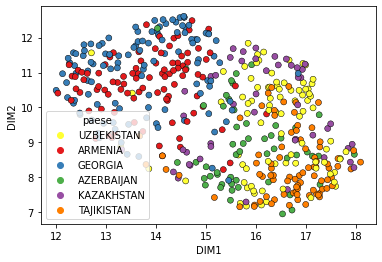

In [ ]:
# get legend
handles, labels = umap_and_plot_legend(umap_df, 'paese', save='no', colors=pal)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8,9))
mds_and_plot(mds_df, 'paese', save='no', ax=axs[0,0], colors=pal)
axs[0, 0].set_title('MDS')
tSNE_and_plot(tsne_df, 'paese', save='no', ax=axs[0,1], colors=pal)
axs[0, 1].set_title('tSNE')
PCA_and_plot(pc_df, 'paese', ax=axs[1,0], colors=pal)
axs[1, 0].set_title('PCA')
umap_and_plot(umap_df, 'paese', save='no', ax=axs[1, 1], colors=pal)
axs[1, 1].set_title('UMAP')

for ax in axs.flat:
    ax.set(xlabel='DIM1', ylabel='DIM2')

fig.legend(handles, labels, loc='lower center', ncol=3)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
#plt.savefig('dimensionality_reduction.pdf', bbox_inches='tight')
plt.close()
plt.show()
#, bbox_to_anchor=(0.5, -0.02)

In [ ]:
sex = [0, 1]
my_colors=["#e41a1c", "#377eb8"]
pal_sex = dict(zip(sex, sns.color_palette(my_colors)))
#sns.set_palette(sns.color_palette(my_colors))

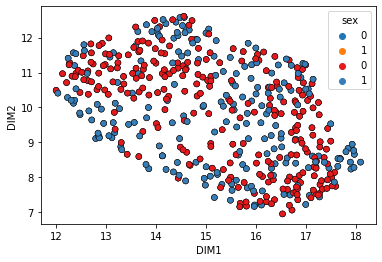

In [ ]:
# get legend
handles, labels = umap_and_plot_legend(umap_df, 'sex', save='no', colors=pal_sex)
labels = ['Females', 'Males']

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8,9))
mds_and_plot(mds_df, 'sex', save='no', ax=axs[0,0], colors=pal_sex)
axs[0, 0].set_title('MDS')
tSNE_and_plot(tsne_df, 'sex', save='no', ax=axs[0,1], colors=pal_sex)
axs[0, 1].set_title('tSNE')
PCA_and_plot(pc_df, 'sex', ax=axs[1,0], colors=pal_sex)
axs[1, 0].set_title('PCA')
umap_and_plot(umap_df, 'sex', save='no', ax=axs[1, 1], colors=pal_sex)
axs[1, 1].set_title('UMAP')

for ax in axs.flat:
    ax.set(xlabel='DIM1', ylabel='DIM2')

fig.legend(handles, labels, loc='lower center', ncol=2)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig('dimensionality_reduction_sex.pdf', bbox_inches='tight')
plt.close()
#plt.show()

# COMPUTATIONS

In [ ]:
coord = pandas.read_csv('drive/My Drive/assegno_padova/clustering/Domestic Environments/coords.txt', sep='\t')
coord.columns = ['village', 'long', 'lat']
coord.head()

,village,long,lat
1,Alga,77.173056,43.445000
2,Almaty,76.895833,43.277500
3,Bukhara,64.433333,39.766667
4,Chambarak,45.354980,40.596550
5,Deprabak,45.143329,40.702589


In [ ]:
df_dim = pandas.concat([mds_df[['DIM1', 'DIM2']], tsne_df[['DIM1', 'DIM2']], pc_df[[0, 1]], umap_df[['DIM1', 'DIM2']]], axis=1)
df_dim.columns = ['dim1_mds', 'dim2_mds', 'dim1_tsne', 'dim2_tsne', 'dim1_pca', 'dim2_pca', 'dim1_umap', 'dim2_umap']

In [ ]:
df_dim['village'] = tab['village']
df_dim['paese'] = tab['paese']
df_dim['age'] = tab['age']
df_dim_ = coord.merge(df_dim, how='left', on='village')

In [ ]:
def corrfunc(x, y, ax=None, hue=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

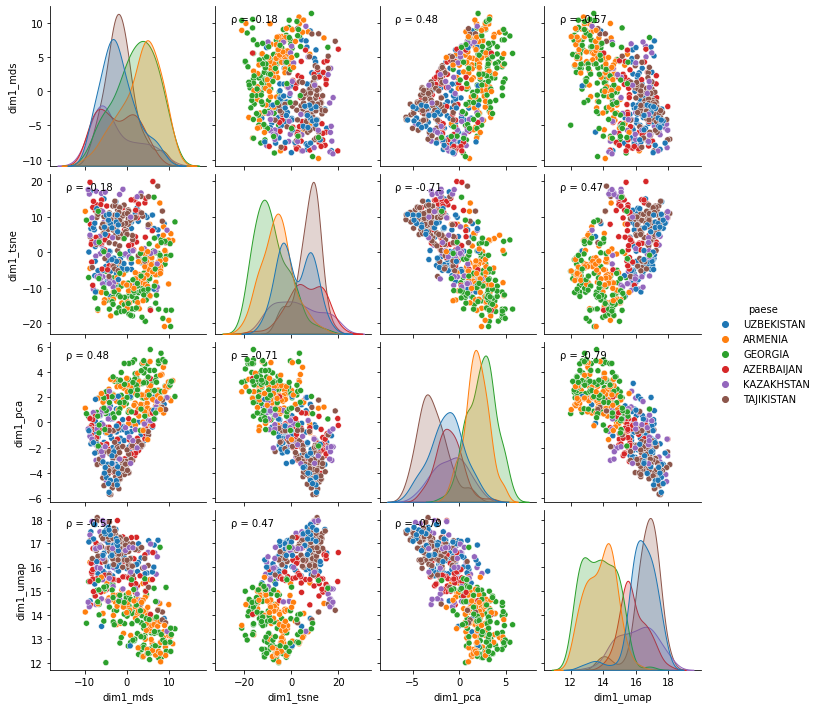

In [ ]:
g = sns.pairplot(df_dim[['dim1_mds','dim1_tsne', 'dim1_pca', 'dim1_umap', 'paese']], hue='paese')
g.map_lower(corrfunc)
g.map_upper(corrfunc)
plt.show()

In [ ]:
plt.close()

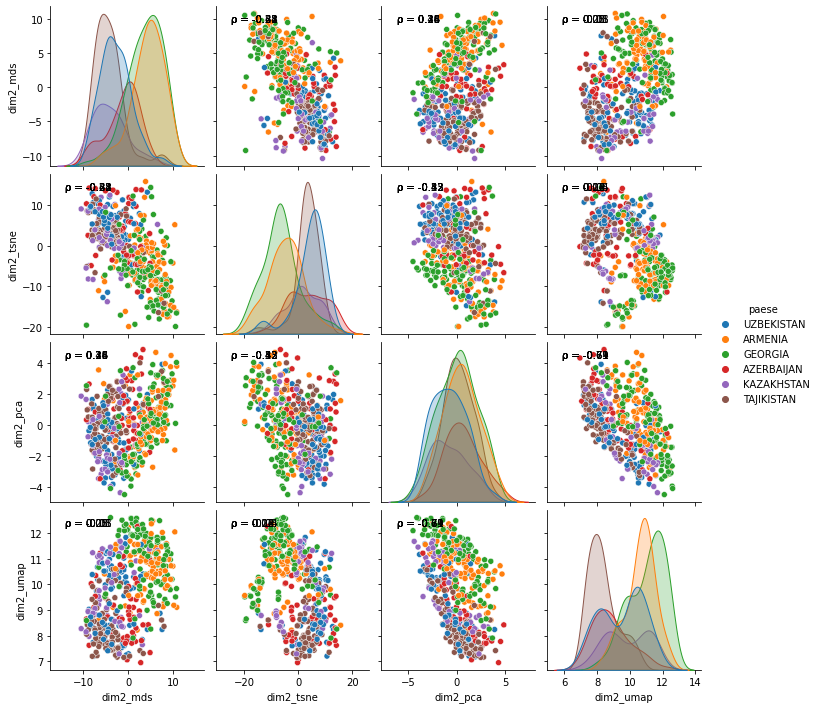

In [ ]:
g = sns.pairplot(df_dim[['dim2_mds','dim2_tsne', 'dim2_pca', 'dim2_umap', 'paese']], hue='paese')
g.map_lower(corrfunc)
g.map_upper(corrfunc)
plt.show()

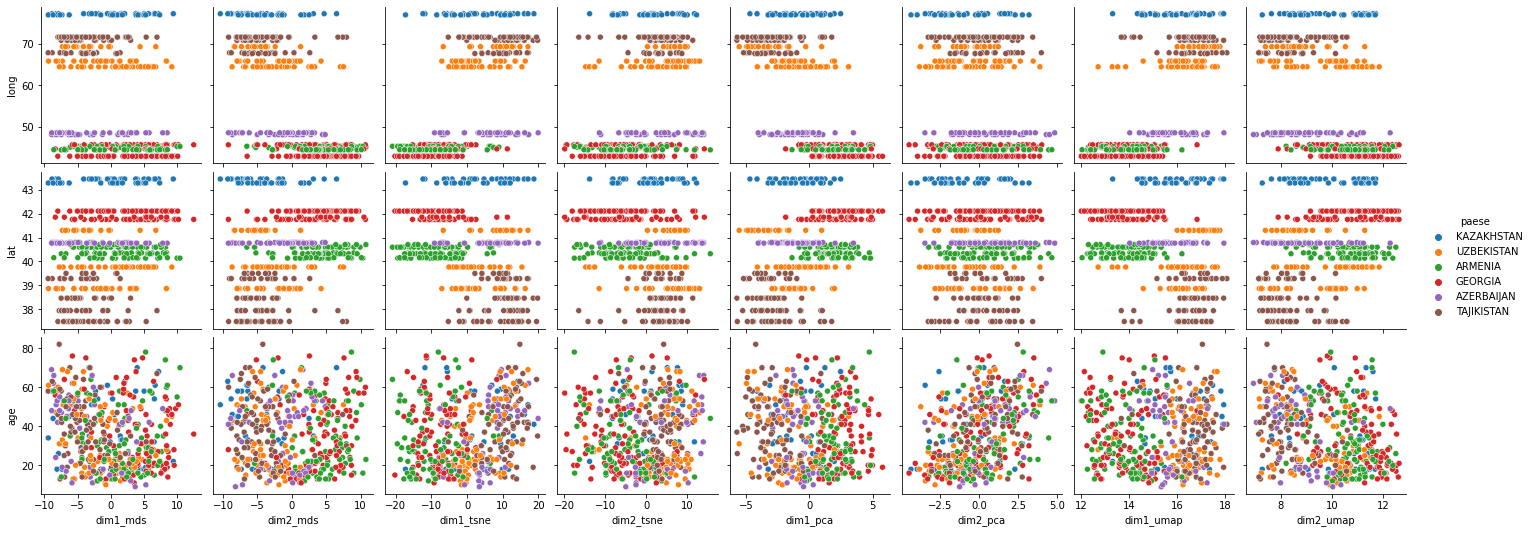

In [ ]:
sns.pairplot(
    df_dim_,
    x_vars=['dim1_mds', 'dim2_mds', 'dim1_tsne', 'dim2_tsne', 'dim1_pca', 'dim2_pca', 'dim1_umap', 'dim2_umap'],
    y_vars=['long', 'lat', 'age'], hue='paese'
)


TO DO: calcolare la correlazione tra latitudine e longitudine per villaggio con la media delle pc

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_dim_['long'], df_dim_['dim1_pca'])
corr


-0.6761835224527072

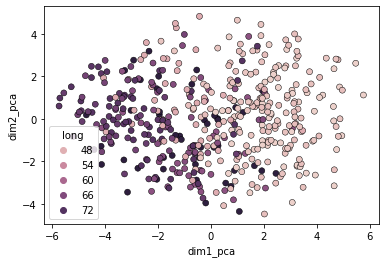

In [ ]:
#handles, labels = umap_and_plot_legend(data = df_dim_, 'long', save='no')

sns.scatterplot( x='dim1_pca', y = 'dim2_pca',
        data=df_dim_,  
        hue='long',
        edgecolor='black')

plt.show()

In [ ]:
df_dim_['long'].dtype.name

'float64'

# PCA for paper

In [ ]:
pc_df_ = coord.merge(pc_df, how='left', on='village')

No handles with labels found to put in legend.


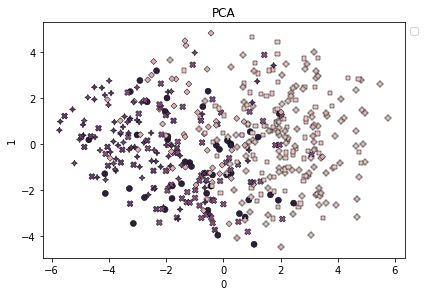

In [ ]:
sns.scatterplot( x=0, y=1,
      data=pc_df_,  
      hue="long",style="paese",
      legend=False, edgecolor="black", alpha=1) 

      #palette="tab20")
      #palette = sns.color_palette("tab10"))
plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
plt.tight_layout()
plt.title('PCA')
    #plt.savefig('PCA.pdf')
plt.show()
    #plt.close()

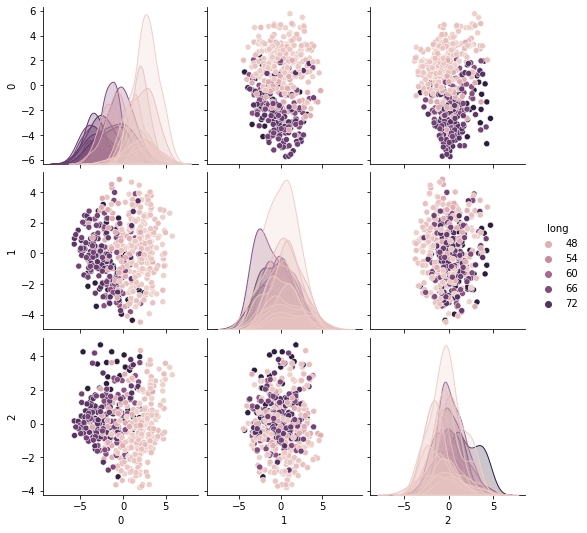

In [ ]:
sns.pairplot(
    pc_df_,
    x_vars=[0, 1, 2],
    y_vars=[0, 1, 2],  hue='long'
)


In [ ]:
pc_df_.to_csv('drive/My Drive/assegno_padova/clustering/pca.tsv')

# PROCRUSTES

In [ ]:
dim_dict = {'geo': ['long', 'lat'],
            'mds': ['dim1_mds', 'dim2_mds'],
            'pca': ['dim1_pca', 'dim2_pca'],
            'tsne': ['dim1_tsne', 'dim2_tsne'],
            'umap': ['dim1_umap', 'dim2_umap']}

for key in dim_dict.keys():
  mtx1, mtx2, disparity = procrustes(df_dim_[['long', 'lat']], df_dim_[dim_dict[key]])
  print(key, disparity)

geo 1.2186328004658172e-30
mds 0.7503595825278759
pca 0.6840896196301651
tsne 0.6539791441713008
umap 0.618190266189842


In [ ]:
scaler = StandardScaler()
geo_sc = scaler.fit_transform(df_dim_[['long', 'lat']])
mtx1, mtx2, disparity = procrustes(geo_sc, df_dim_[dim_dict['pca']])

In [ ]:
scaler.inverse_transform(mtx1)
df_dim_[['long', 'lat']].head()

,long,lat
0,77.173056,43.445
1,77.173056,43.445
2,77.173056,43.445
3,77.173056,43.445
4,77.173056,43.445
